In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=1698


In [2]:
H = create_hamiltonian(system), 0.05

In [3]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

NameError: name 'SHEA' is not defined

<Axes: title={'center': 'Qubit layout'}>

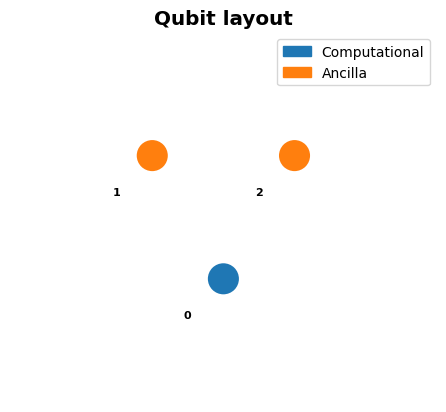

In [ ]:
qubits.show_layout()

In [ ]:
# theta_opt = np.load("losses_theta_opt.npy")

In [ ]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=200, n_grad=10)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=27548
Iteration: 0 
            Max gradient term: 0.05087500028450043 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.92157522e-02
 -2.92157522e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.05969900e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.41959475e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.37164902e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.08750003e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.003914140778969472 
            Current gradient: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.0014226   0.          0.          0.          0.          0.00083616
  0.          0.          0.          0.          0.          0.
 -0.0011023   0.00110935  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00140445  0.          0.          0.
  0.          0.          0.00060319  0.          0.          0.
  0.          0.         -0.00061731  0.00391414  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00187282  0.          0.          0.          0.          0.
  0.          0.          0.          0.         

In [ ]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [ ]:
theta_opt

array([0.82362344, 1.        , 1.        , 0.8646083 , 0.87174025,
       0.91840857, 1.02420739, 1.14940401, 1.17342099, 0.94579503,
       1.02537389, 1.03529121, 1.01567352, 1.03302124, 0.96565275,
       1.00011078, 0.79823644, 1.01906134, 0.96326293, 1.54075989,
       0.85020033, 0.99627937, 1.08335341, 0.86033562, 1.12403566,
       1.11396602, 1.2159443 , 0.93067522, 0.94193586, 0.60409734,
       1.00816691, 1.00352657, 1.01161073, 0.89769454, 1.02803966,
       0.96273913, 0.98209347, 1.08418973, 0.99225169, 1.03562453,
       1.01725332, 0.96822954, 1.04939044, 1.07488124, 0.99036812,
       0.97126855, 0.74306687, 1.01246973, 0.99633588, 1.3118722 ,
       1.04248356, 0.8427892 , 0.86983255, 0.99649902, 0.95211351,
       0.98840631, 0.98301475, 0.96260268, 0.96155043, 1.04748641,
       0.98340673, 0.98640466, 1.12072797, 1.01702042, 0.96564523,
       0.83241092, 0.72076012, 1.06138874, 1.11129297, 0.99983288,
       0.8770764 , 1.00185209, 1.10951558, 1.04181093, 1.02165

<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

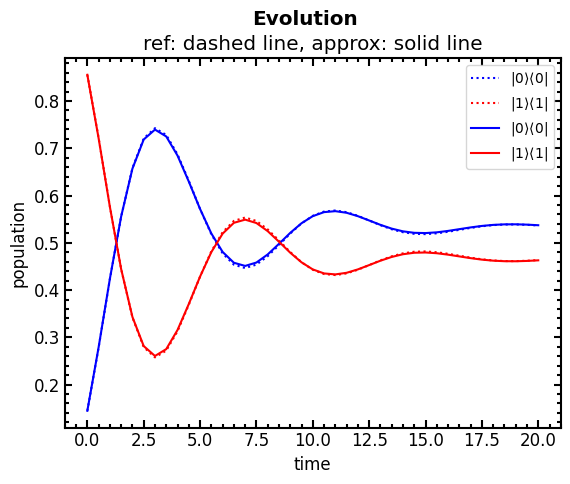

In [ ]:
rho0 = rho_rand_haar(1, 4)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

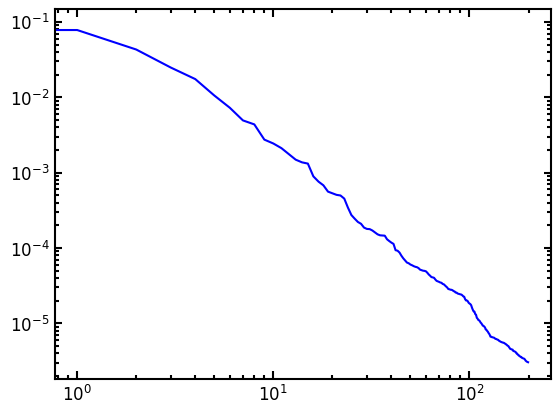

In [ ]:
plt.loglog(errors)